<a href="https://www.kaggle.com/code/suyashkapil/neural-networks-digit-recogniser?scriptVersionId=113712933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import losses
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
inpds = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
inpds

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


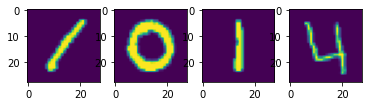

In [24]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(inpds.iloc[i,1:].values.reshape(28,28))
#plots first 4 entries of the label column

In [4]:
x = inpds.iloc[:,1:]
y = inpds.iloc[:,0:1]
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size =0.2)
#splitting the train dataset(inpds) to validation and train dataset
print(x.head(10))
print(y.head(10))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0

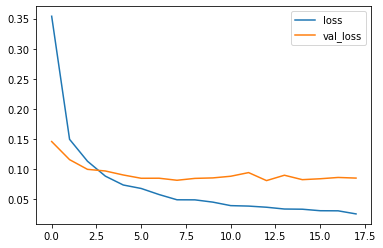

In [31]:
import warnings
warnings.filterwarnings("ignore")
#to avoid warnings

earlystop = callbacks.EarlyStopping(  #to avoid overfitting
    min_delta = 0.001,
    patience = 10 ,
    restore_best_weights = True,
)
#Network with 2 hidden layers with activation function relu and 256 units
#output layer with activation function sofftmax and 10 units
#Batch Normalization and Dropout performed after each layer
model = keras.Sequential([
    layers.Dense(256,activation ='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)
classify = model.fit(
    x_train ,y_train,
    validation_data = (x_test,y_test ),
    callbacks = [earlystop],
    batch_size = 128,
    epochs = 512,
    verbose =0,
)

history_df = pd.DataFrame(classify.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [6]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test #loading test dataset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
result = model.predict(test)
final = np.argmax(result,axis =-1)
final #array with all predictions

array([2, 0, 9, ..., 3, 9, 2])

In [8]:
index = np.arange(1,len(final)+1,1)
submit = pd.DataFrame(index = index)
submit['Label'] = final
submit   #dataframe with all predictions

,Label
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
27999,9


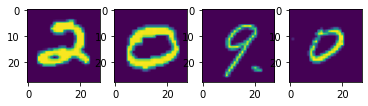

In [28]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(test.iloc[i,:].values.reshape(28,28))
#Displayes first 4 entries of the test dataset
#This shows that 4th label is wrong.It should be 0 instead of 9

In [10]:
submit.to_csv('submissions.csv')
# The score on first submission on kaggle is 0.97382
# This is a better score than my previous model where I used ML models like SVM :
# https://www.kaggle.com/code/suyashkapil/basic-digit-recognizer